# Exercise: Radiance and vicarious calibration

David R. Thompson, Jet Propulsion Laboratory, California Institute of Technology<br>
Contact: david.r.thompson@jpl.nasa.gov
__________

This exercise goes back to the basics - raw digital numbers streaming off the focal plane. We apply a calibration solution to get radiance data, identify a location in a scene where in-situ reference data was acquired, and compare the remote measurement to two different predictions based on different Radiative Transfer Models (RTMS).  We load the raw digital numbers and calibration files.  

In [16]:
import scipy as s
from scipy.linalg import norm, inv
import pylab as plt
import figure_style

# Load the target 
wavelengths = s.loadtxt('data/wavelengths.txt')

# Load the data - BIL interleave
rows, cols, bands = 400,598,425
mm = s.memmap('data/dn', dtype=s.uint16, mode='r', shape=(rows,bands,cols))
dn = s.asarray(mm).copy()
mm = s.memmap('data/flatfield', dtype=s.float32, mode='r', shape=(bands,cols))
ff = s.asarray(mm).copy()
mm = s.memmap('data/dark', dtype=s.float32, mode='r', shape=(bands,cols))
dark = s.asarray(mm).copy()
rcc = s.loadtxt('data/rcc.txt')

# Load ATREM radiance prediction
atrem = s.loadtxt('data/rdn_pred_atrem.txt')
modtran = s.loadtxt('data/rdn_pred_modtran.txt')

Now, apply the calibration solution.  Recall our simple linear radiometric calibration model, where $L$ is radiance, $R_{cc}$ are linear calibration coefficients, $R_{flat}$ are flat field perturbations, and $\alpha_{dark}$ represents the dark offset:

$$ DN = L  R_{cc}^{-1} R_{flat}^{-1} + \alpha_{dark}$$

Calculate the calibrated radiance cube.

In [17]:
# Do the calibration
rdn = s.zeros((rows,bands,cols),dtype=s.float32)
for i in range(rows):
    rdn[i:i+1] = ((s.squeeze(dn[i:i+1,:,:])-dark).T*rcc).T*ff

Plot the resulting radiance, and the residuals against the ATREM and MODTRAN model solutions.  

<b> Question 1: </b> Which gives you the better match? 
    
<b> Question 2: </b> Is there structure in the residual error, and if so, why?

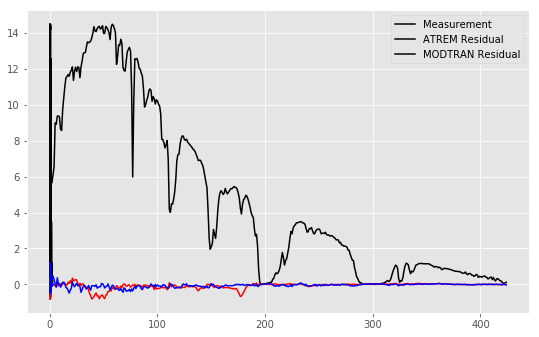

In [18]:
plt.plot(wavelengths,s.squeeze(rdn[231,:,267]),'k')
plt.plot(wavelengths,s.squeeze(rdn[231,:,267])-atrem.T,'r')
plt.plot(wavelengths,s.squeeze(rdn[231,:,267])-modtran.T,'b')
plt.legend(('Measurement','ATREM Residual','MODTRAN Residual'));

-------------
<b>Acknowledgements</b>: A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. We acknowledge the support of a PRISM AITT grant from the National Aeronautics and Space Administration (NASA) Earth Science Technology Office. We acknowledge the support of the JPL and Caltech Presidents’ and Directors’ Fund Program. We thank other supporting sponsors including the NASA Earth Science Division for the HyspIRI preparatory campaign, the AVIRIS-NG instrument and the data analysis program “Utilization of Airborne Visible/Infrared Imaging Spectrometer Next Generation Data from an Airborne Campaign in India” NNH16ZDA001N-AVRSNG, for its support of the algorithm development; the Jet Propulsion Laboratory Research and Technology Development Program; and the NASA Center Innovation Fund managed in conjunction with the Jet Propulsion Laboratory Office of the Chief Scientist and Technologist. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.